10500
681.0834754584688
776.0701152725338
855.0206653305454
915.6781242792009
935.618960621551
937.1134428143725
944.0414439987528
962.7902413115157
960.2439875329976
969.459903294286
964.61235296041
953.134278226341
947.8484251977471
955.8244775053473
948.3092422181419
897.2930653359148
839.6028257634522
775.4937441226759
717.6045855442754
642.0787491729378
542.3127815192812
428.0379454900693
307.00623342218097
211.36877849858388
185.77392212938778
254.41070115380614
374.81290359133715
496.7002582191765
598.9937164106784
663.6426739634278
742.2941302103836
813.9787920975791
883.9346219737454
921.9095239286355
914.9777271525561
[24]


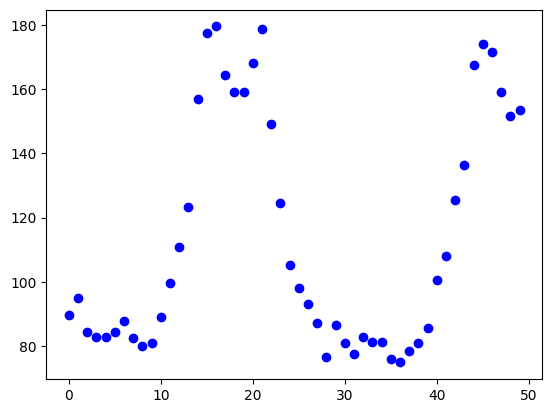

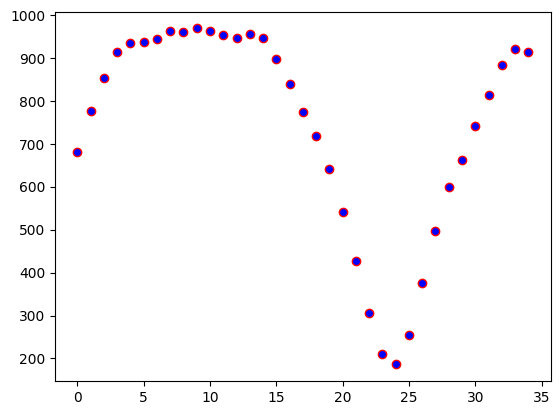

In [8]:
from math import sqrt, pow, acos
import numpy as np
import json
from scipy import signal
import matplotlib.pyplot as plt

 
# 由于文件中有多行，直接读取会出现错误，因此一行一行读取
file = open("cnn_data1_1.json", 'r', encoding='utf-8')
keypoints = []
i=0
for line in file.readlines():
    dic = json.loads(line)
    keypoints.append(dic)
    #print(line)
    i=i+1
print(i)

a=keypoints[2100:2150]

pattern=[118.8589540646638, 125.53607139836588, 133.26291685014698, 151.0608954265668, 162.9591136621205, 168.13987020349498, 173.3011197194798, 177.80499893572988, 177.80499893572988, 171.9251772639162, 172.85086814947013, 164.76053906589502, 156.69984911240775, 139.08440986657644, 129.0761349679326, 115.6391075863956]
for i in range(16):
    pattern[i]=pattern[i]-8
    
#print(pattern)
    
def angle_of_vector(v1, v2):
    pi = 3.1415
    vector_prod = v1[0] * v2[0] + v1[1] * v2[1]
    length_prod = sqrt(pow(v1[0], 2) + pow(v1[1], 2)) * sqrt(pow(v2[0], 2) + pow(v2[1], 2))
    cos = vector_prod * 1.0 / (length_prod * 1.0 + 1e-6)
    return (acos(cos) / pi) * 180

def get_angle_foraction1(a):
    #print(a)
    v1=np.array([a[0],a[1]])
    v2=np.array([a[4],a[5]])
    v3=v2-v1
    v4=np.array([a[2],a[3]])
    v5=np.array([a[6],a[7]])
    v6=v5-v4
    angle_l=180-angle_of_vector(v1, v3)
    angle_r=180-angle_of_vector(v4, v6)
    return angle_l,angle_r

def get_angle_list(a): 
    y_l=[]
    y_r=[]
    x=[]
    for i in range(len(a)):
        an1,an2 = get_angle_foraction1(a[i])
        #print(an1,an2)
        x.append(i)
        y_l.append(an1)
        y_r.append(an2)
    return x,y_l,y_r

def listsub_and_sum(e=[],r=[]):
    n=[]
    for i in range(len(e)):
        u=e[i]-r[i]
        n.append(u)
    re = sum_of_absolute_values(n)
    return re

def sum_of_absolute_values(lst):
    absolute_values = [abs(x) for x in lst]
    total_sum = sum(absolute_values)
    return total_sum

def pattern_matching(a,pattern):
    re1=[]
    re2=[]
    for i in range(35):
        #print(type(a[50-i-16:50-i]))
        #print(i)
        x,y_l,y_r=get_angle_list(a[50-i-16:50-i])
        print(listsub_and_sum(y_l,pattern))
        re1.append(listsub_and_sum(y_l,pattern))
        re2.append(listsub_and_sum(y_r,pattern))
    return re1,re2

#画图


re1,re2=pattern_matching(a,pattern)
#print(re1,re2)
re1=np.array(re1)
re2=np.array(re2)
peak_indexes1 = signal.argrelextrema(re1, np.less, order=10)
peak_indexes1 = peak_indexes1[0]
print(peak_indexes1)
peak_indexes2 = signal.argrelextrema(re2, np.less, order=10)
peak_indexes2 = peak_indexes2[0]
#print(peak_indexes2)

nb=[]
for i in range(35):
    nb.append(i)
    
    
x,y,z = get_angle_list(a)   
import matplotlib.pyplot as plt
import pandas as pd
color = ['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']
plt.scatter(x, y, c=color[1], edgecolors='b')
plt.show()
plt.scatter(nb, re1, c=color[1], edgecolors='r')
plt.show()


[4]


In [2]:
#实时获取数据并输入模型
import json
import socket
from keras.models import load_model
import tensorflow as tf
#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
import pattlib as pm
#将骨骼坐标数据转化为训练数据
import cv2
import numpy as np
import time
import json
from scipy import signal

pattern=[118.8589540646638, 125.53607139836588, 133.26291685014698, 151.0608954265668, 162.9591136621205, 168.13987020349498, 173.3011197194798, 177.80499893572988, 177.80499893572988, 171.9251772639162, 172.85086814947013, 164.76053906589502, 156.69984911240775, 139.08440986657644, 129.0761349679326, 115.6391075863956]
for i in range(16):
    pattern[i]=pattern[i]-8
#data_D=len(keypoints)
def listsub(e=[],r=[]):
    n=[]
    for i in range(2):
        u=e[i]-r[i]
        n.append(u)
    return n

def speed_evaluate(list):
    #print(list)
    re=0
    for i in range(len(list)-1):
        if abs(list[i]-list[i+1])>12:
            re = 1
            break
    
    return re
    

def co_convert(co):
    for i in range(len(co)):
        if co[i]!=[0,0]:
            co[i]=listsub(co[i],co[17])
    return co

def save_to_json(data):
    with open('data1.json', 'a') as file:
        json.dump(data, file)
        file.write('\n')
        
def list_to_string(lst):
    str_lst = [str(element) for element in lst]  # 将列表中的每个元素转换为字符串
    result = ','.join(str_lst)  # 使用空字符串连接所有字符串元素
    result = '['+result+']'
    return result

def getframework(co):
    a=co[5]
    a[1]=a[1]-15
    coo=a
    h=co[15][1]-co[5][1]
    return coo,h
    

def convert(keypoints):
    # = int(object_counts[0])
    #K = topology.shape[0]
    
    #color = (0, 255, 0)
    sk=[]
    k=co_convert(keypoints[0])
    #print(k)
    for j in range(18):
        if 4<j<17:
            d = k[j]
        #if k != [0,0]:
            sk.append(d[0])
            sk.append(d[1]) 
    return sk

def show_re(image,data_,lis):
    if len(data_)==50:
            z=np.mat(data_)
            z=np.expand_dims(z, axis=0)
            re=model(z)
            re=re.numpy()
            re=re[0]
            oi=np.where(re==np.max(re))
            io=np.max(re)
            oi=list(oi)
            oi=oi[0][0]
            oii=oi
                        #print(type(io))
            
            oi=str(oi)
                        #image = np.zeros([224, 224, 3], np.uint8)+255 
            if io>0.5:
                cv2.putText(image,oi,(0,20),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,255,0),1)
                io=str(io)
                cv2.putText(image,io,(0,40),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,255,0),1)
                if oii==0:
                    cv2.putText(image,'side lateral raise is doing',(0,110),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                    re1,re2 = pm.pattern_matching(data_,pattern)
                    re1=np.array(re1)
                    peak_indexes = signal.argrelextrema(re1, np.less, order=10)
                    peak_indexes = peak_indexes[0]
                    
                    if peak_indexes.size>0:
                        peak_indexes=min(peak_indexes)
                        edge = 50-peak_indexes-1
                        
                        ede = data_[edge-16:edge]
                        #print(ede)
                        x,y_l,y_r = pm.get_angle_list(ede)
                        #print(max(y_l))
                    #x,y,z = get_angle_list(ede) 
                    #peak_indexes=max(y)
                    #peak_indexes = str(peak_indexes)
                        max_angle_l=max(y_l)
                        max_angle_r=max(y_r)
                        min_angle_l=min(y_l)
                        min_angle_r=min(y_r)
                        #print(min_angle_l)
                        spe=speed_evaluate(y_l)
                        #print(spe)
                        if spe==1:
                            cv2.putText(image,'speed so fast',(0,180),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)
                        else:
                            cv2.putText(image,'good speed',(0,180),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                        if max_angle_l<160:
                            cv2.putText(image,'insufficient arm raising',(0,210),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)
                        else:
                            cv2.putText(image,'sufficient arm raising',(0,210),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                        cv2.putText(image,'max angle:',(0,140),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                        cv2.putText(image,str(max_angle_l),(110,140),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                    
                if oii==1:
                    cv2.putText(image,'bicep curl is doing',(0,110),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                if oii==2:
                    cv2.putText(image,'dumbell front raise is doing',(0,110),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                if oii==3:
                    cv2.putText(image,'dumbbell squat is doing',(0,110),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)
                            #print(lst[0])
                image = cv2.rectangle(image, lis[0][5], lis[0][12], (255, 0, 0), 1)
                            #print(lis[0][5])
    cv2.namedWindow("frame",cv2.WINDOW_NORMAL)
    cv2.imshow("frame",image)

def start_server(host, port, model):
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(1)
    
    cap = cv2.VideoCapture('./test128.mp4')

# 设置摄像头帧率为10帧每秒
    #cap.set(cv2.CAP_PROP_FPS, 15)

# 设置摄像头分辨率为224x224
    #cap.set(3, 224)  # 设置宽度
    #cap.set(4, 224)  # 设置高度

    print(f"服务器正在监听 {host}:{port}")
    data_ = []
    while True:
        client_socket, client_address = server_socket.accept()
        print(f"与客户端 {client_address[0]}:{client_address[1]} 建立连接")

        while True:
            
            try:
                data = client_socket.recv(1024).decode().strip()
                #time.sleep(0.05)
                if not data:
                    break

                try:
                    da='['+data+']'
                    #da.append(data)
                    #print(da)
                    ret, image = cap.read()
                    lis=json.loads(da)
                    lst = json.loads(da)
                    #print(lst)
                    z=convert(lst)
                    data_.append(z)
                    #print(len(data_))
                    
                    #image = cv2.resize(frame, (224, 224))
                    show_re(image,data_,lis)
                    if len(data_)==50:
                        
                        del(data_[0])
                except json.JSONDecodeError:
                    print("接收到的数据不是有效的JSON格式")
                
            except ConnectionResetError:
                break
            if cv2.waitKey(1)&0xFF==ord("q"):
                break
        if not data or data.decode('utf-8') == 'exit':
            break
        break
        print(f"与客户端 {client_address[0]}:{client_address[1]} 连接断开")
        client_socket.close()
        break
    server_socket.close()

# 用于测试的主函数
if __name__ == "__main__":
    host = '192.168.100.90'  # 服务器的主机地址
    port = 8871  # 服务器的端口号
    #del model 
    model = load_model('1Dcnnmodel.h5')
    start_server(host, port, model)


服务器正在监听 192.168.100.90:8871


KeyboardInterrupt: 

In [15]:
hd=[1]

In [16]:
min(hd)

1